In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest
import time

In [ ]:
def glc_generator(seed, a, c, m, N):
    x = seed
    samples = []
    for n in range(N):
        x = (a * x + c) % m
        samples.append(x / m)  #normalización -> unif(0,1)
    return samples

In [ ]:
semilla = 1234
intentos = [
    (1664525, 1013904223, 2**32),
    (1103515245, 12345, 2**31),
    (22695477, 1, 2**32),
    (5,1,512),
    
]
N = 1000


Parámetros intento 1
a = 1664525 , c = 1013904223 , m = 4294967296
Estadístico KS: 0.021713746666908285 , p-valor: 0.7247820284239618
No se puede rechazar la hipótesis de uniformidad



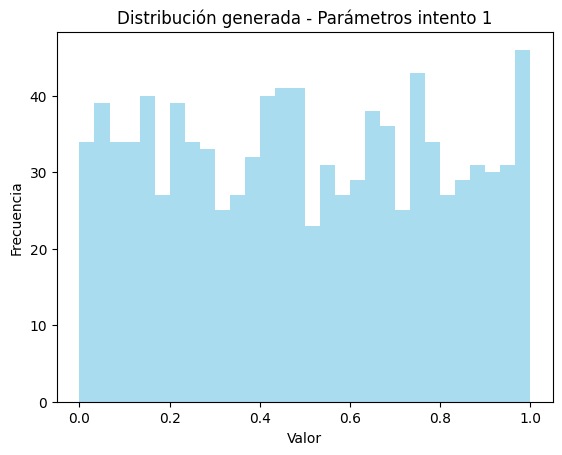

Parámetros intento 2
a = 1103515245 , c = 12345 , m = 2147483648
Estadístico KS: 0.027494675736874363 , p-valor: 0.4286198194554214
No se puede rechazar la hipótesis de uniformidad



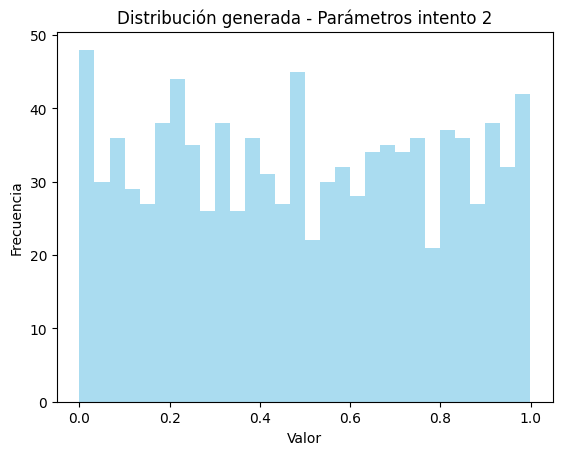

Parámetros intento 3
a = 22695477 , c = 1 , m = 4294967296
Estadístico KS: 0.04827432515472174 , p-valor: 0.018292643915840106
Se rechaza la hipótesis de uniformidad



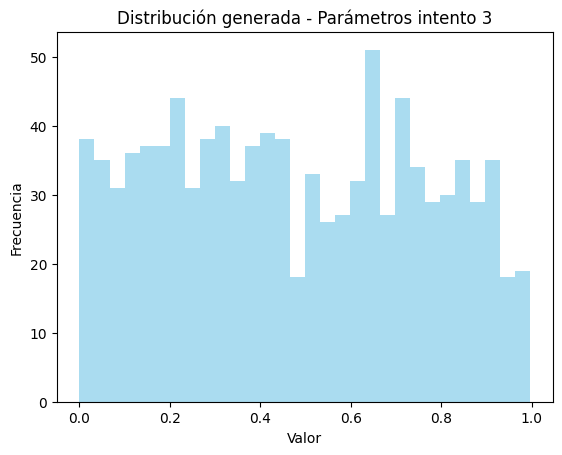

Parámetros intento 4
a = 5 , c = 1 , m = 512
Estadístico KS: 0.0061875000000000124 , p-valor: 0.9999999999993939
No se puede rechazar la hipótesis de uniformidad



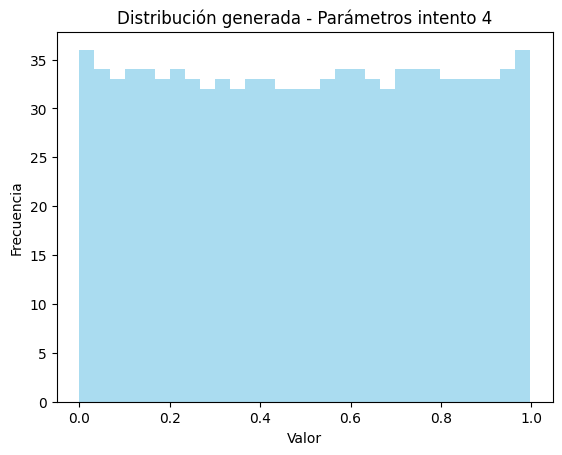

In [52]:
for i, (a, c, m) in enumerate(intentos):
    samples = glc_generator(semilla, a, c, m, N)
    
    # Prueba de Kolmogorov-Smirnov para comparar con una distribución uniforme Unif(0, 1)
    ks_stat, p_value = kstest(samples, 'uniform')
    
    # Mostrar resultados
    print("Parámetros intento", i + 1)
    print("a =", a, ", c =", c, ", m =", m)
    print("Estadístico KS:", ks_stat, ", p-valor:", p_value)
    if p_value > 0.05:
        print("No se puede rechazar la hipótesis de uniformidad\n")
    else:
        print("Se rechaza la hipótesis de uniformidad\n")
    
    # Graficar histograma individual
    plt.figure()  # Crear una nueva figura para cada histograma
    plt.hist(samples, bins=30, alpha=0.7, color='skyblue')
    plt.title(f"Distribución generada - Parámetros intento {i + 1}")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.show()

------------------------------------------------------------------------
Parámetros intento 1
a=1664525, c=1013904223, m=4294967296
Estadístico KS: 0.0217, p-valor: 0.7248
No se puede rechazar la hipótesis de uniformidad
------------------------------------------------------------------------
Parámetros intento 2
a=1103515245, c=12345, m=2147483648
Estadístico KS: 0.0275, p-valor: 0.4286
No se puede rechazar la hipótesis de uniformidad
------------------------------------------------------------------------
Parámetros intento 3
a=22695477, c=1, m=4294967296
Estadístico KS: 0.0483, p-valor: 0.0183
Se rechaza la hipótesis de uniformidad
------------------------------------------------------------------------
Parámetros intento 4
a=5, c=1, m=512
Estadístico KS: 0.0062, p-valor: 1.0000
No se puede rechazar la hipótesis de uniformidad


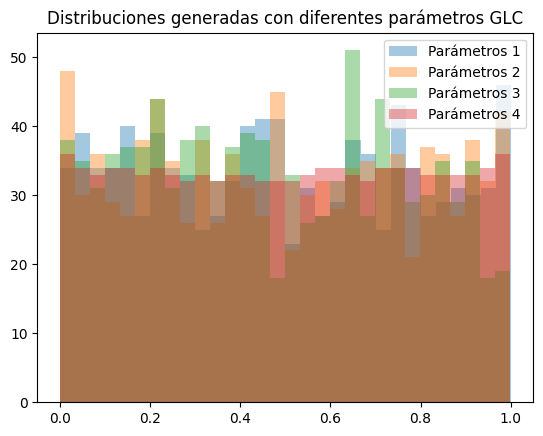

In [53]:
for i, (a, c, m) in enumerate(intentos):
    resultados = glc_generator(semilla, a, c, m, N)
    
    ks_stat, p_value = kstest(resultados, 'uniform')

    print("------------------------------------------------------------------------")
    print(f"Parámetros intento {i + 1}")
    print(f"a={a}, c={c}, m={m}")
    print(f"Estadístico KS: {ks_stat:.4f}, p-valor: {p_value:.4f}")
    if p_value > 0.05:
        print("No se puede rechazar la hipótesis de uniformidad")
    else:
        print("Se rechaza la hipótesis de uniformidad")

    plt.hist(resultados, bins=30, alpha=0.4, label=f'Parámetros {i+1}')

plt.legend()
plt.title("Distribuciones generadas con diferentes parámetros GLC")
plt.show()